In [31]:
import os
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import shutil
import PIL
from PIL import Image

train_apple_dir = os.path.join('/content/drive/MyDrive/dataset/apple')

train_not_apple_dir = os.path.join('/content/drive/MyDrive/dataset/not_apple')

train_apple_names = os.listdir(train_apple_dir)
print(train_apple_names)

train_not_apple_names = os.listdir(train_not_apple_dir)
print(train_not_apple_names)

['apple_5.png', 'apple_3.png', 'apple_7.jpg', 'apple_6.png', 'apple_1.png', 'apple_8.jpg', '_0_9389843.jpg', '_2_7077621.jpg', '_4_295667.jpg', '_1_3895640.jpg', '_7_5350086.jpg', '_5_8320836.jpg', '_6_1836435.jpg', '_3_7786738.jpg', '_7_6568739.jpg', '_4_8506189.jpg', '_1_7746790.jpg', '_5_5015965.jpg', '_0_9336303.jpg', '_5_9784479.jpg', '_1_7757305.jpg', '_7_6178190.jpg', '_2_3064848.jpg', '_6_8899390.jpg', '_3_9468969.jpg', '_0_4976769.jpg', '_3_5277463.jpg', '_4_1872596.jpg', '_6_6220151.jpg', '_1_2347517.jpg', '_2_8424653.jpg', '_7_1841323.jpg']
['265_100.jpg', 'r_271_100.jpg', '0_100.jpg', 'r_302_100.jpg', '146_100 (1).jpg', '214_100.jpg', '51_100.jpg', '192_100.jpg', 'r_309_100.jpg', '288_100.jpg', 'r_95_100.jpg', 'r_94_100.jpg', 'r_149_100.jpg', '217_100.jpg', 'r_302_100 (1).jpg', '49_100.jpg', 'r_128_100.jpg', 'r_318_100.jpg', '174_100.jpg', '176_100.jpg', 'r_307_100.jpg', 'r_314_100.jpg', 'r_96_100.jpg', 'r_66_100.jpg', 'r_57_100.jpg', '_16_7013252.jpg', '_1_7914247.jpg', '_

In [32]:
print('total training apple images:', len(os.listdir(train_apple_dir)))
print('total training non-apple images:', len(os.listdir(train_not_apple_dir))) #the below output currently shows

total training apple images: 32
total training non-apple images: 37


**Below code is for resizing the images as images were of varying size.**

In [33]:
f = r'/content/drive/MyDrive/dataset/apple'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((400,400))
    img.save(f_img)
    print(img.size)


f = r'/content/drive/MyDrive/dataset/not_apple'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((400,400))
    img.save(f_img)


(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)


**since there is a slight imbalance in the given images of apple hence image augmentation has been utilized for oversampling the training images for apple.**

In [34]:
class_list = ['apple','not_apple']

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    img_class = item

    img_list = os.listdir('/content/drive/MyDrive/dataset/' + img_class)

    for fname in img_list:
            src = os.path.join('/content/drive/MyDrive/dataset/' + img_class, fname)
            dst = os.path.join(img_dir, fname)
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = '/content/drive/MyDrive/dataset/' + img_class

    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 1

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(400,400),
                                                    batch_size=batch_size)

    
    num_aug_images_wanted = 40 # total number of images we want to have in each class

    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):
        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 32 images belonging to 1 classes.
Found 35 images belonging to 1 classes.


In [35]:
print('total training apple images:', len(os.listdir(train_apple_dir)))
print('total training non-apple images:', len(os.listdir(train_not_apple_dir)))

total training apple images: 40
total training non-apple images: 40


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset/', 
        classes = ['apple','not_apple'],
        target_size=(200, 200), 
        batch_size=120,
        class_mode='binary')


validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/valid_apple',  
        classes = ['apple','not_apple'],
        target_size=(200, 200),  
        batch_size=19,
        class_mode='binary',
        shuffle=False)

Found 78 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [37]:

import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

**creation of the convolutional layers**

In [38]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
model.fit_generator(train_generator,
         epochs = 30,
         validation_data = validation_generator
         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/30
1/1 [==============================] - 10s 10s/step - loss: 0.6889 - accuracy: 0.7051 - val_loss: 1.0806 - val_accuracy: 0.3913
Epoch 2/30
1/1 [==============================] - 7s 7s/step - loss: 0.6527 - accuracy: 0.5897 - val_loss: 0.8978 - val_accuracy: 0.6522
Epoch 3/30
1/1 [==============================] - 7s 7s/step - loss: 1.4294 - accuracy: 0.4872 - val_loss: 0.4954 - val_accuracy: 0.7826
Epoch 4/30
1/1 [==============================] - 7s 7s/step - loss: 0.5785 - accuracy: 0.6795 - val_loss: 0.8651 - val_accuracy: 0.3478
Epoch 5/30
1/1 [==============================] - 7s 7s/step - loss: 0.6408 - accuracy: 0.5128 - val_loss: 0.7250 - val_accuracy: 0.4783
Epoch 6/30
1/1 [==============================] - 7s 7s/step - loss: 0.5624 - accuracy: 0.5641 - val_loss: 0.5774 - val_accuracy: 0.6087
Epoch 7/30
1/1 [==============================] - 7s 7s/step - loss: 0.4872 - accuracy: 0.8333 - val_loss: 0.5014 - val_accuracy: 0.7391
Epoch 8/30
1/1 [=======================

**saving the model**

In [46]:
model_json = model.to_json()
with open("apple_classifier_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("apple_classifier_model.h5")
print("Saved model to disk")

Saved model to disk


**prediction**

In [44]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(200,200))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Not an apple",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("An apple",fontsize=30)

[[1.]]


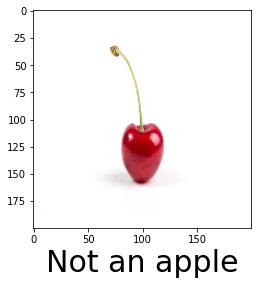

In [45]:
predictImage('/content/photo-1528820600606-0ef5600cbfee.jpg')